# Atlantic puffins

# Gestion du bucket
## import des packages

In [3]:
import s3fs
import pandas as pd
import geopandas as gpd


## lecture des fichiers

In [4]:
glace_arctique = pd.read_csv("glace_arctique.csv")

glace_arctique.head()

,date,- values
0,1978-07-01,12883721.0
1,1979-07-01,12545688.0
2,1980-07-01,12604683.0
3,1981-07-01,12447845.0
4,1982-07-01,12703892.0


## liens d'accès au bucket

In [5]:
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "abovet"
BUCKET_EVE = "esam"

FILE_PATH_OUT_S3_EVE = f"{BUCKET_EVE}/diffusion/eBird/ebd_atlpuf_relSep-2024.txt"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/glace_arctique.csv"



## Ecrire un fichier csv dans le bucket

In [6]:
with fs.open(FILE_PATH_OUT_S3, "w") as file_out:
    glace_arctique.to_csv(file_out)

## lire un fichier csv à partir du bucket

In [7]:
with fs.open(FILE_PATH_OUT_S3, "r") as file_in:
    df_dpe = pd.read_csv(file_in)

# Vérification
df_dpe.head(2)

#lecture du document du bucket d'eve
with fs.open(FILE_PATH_OUT_S3_EVE, "r") as file_in:
    df_eBird = pd.read_csv(file_in, sep="\t")

print(df_eBird.head(2))

                         GLOBAL UNIQUE IDENTIFIER            LAST EDITED DATE  \
0  URN:CornellLabOfOrnithology:EBIRD:OBS866002750  2021-02-10 03:14:37.399064   
1  URN:CornellLabOfOrnithology:EBIRD:OBS993369829         2020-10-11 16:55:53   

   TAXONOMIC ORDER CATEGORY  TAXON CONCEPT ID      COMMON NAME  \
0             6339  species  avibase-2771624B  Atlantic Puffin   
1             6339  species  avibase-2771624B  Atlantic Puffin   

      SCIENTIFIC NAME  SUBSPECIES COMMON NAME  SUBSPECIES SCIENTIFIC NAME  \
0  Fratercula arctica                     NaN                         NaN   
1  Fratercula arctica                     NaN                         NaN   

  EXOTIC CODE  ... NUMBER OBSERVERS ALL SPECIES REPORTED GROUP IDENTIFIER  \
0         NaN  ...              NaN                    0              NaN   
1         NaN  ...              1.0                    0              NaN   

  HAS MEDIA APPROVED REVIEWED REASON TRIP COMMENTS SPECIES COMMENTS  \
0         0        1  

/tmp/ipykernel_88476/3429522216.py:9: DtypeWarning: Columns (9,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eBird = pd.read_csv(file_in, sep="\t")


## de même avec des dossiers

In [8]:
fs.put("zones_ornithologiques/", f"{MY_BUCKET}/diffusion/zones_ornithologiques/", recursive=True)

# Récupération des fichiers depuis MinIO vers la machine locale
fs.get(f"{MY_BUCKET}/diffusion/zones_ornithologiques/", "zones_ornithologiques2/", recursive=True)

df_zones = gpd.read_file("zones_ornithologiques2/")
df_zones.head(2)


,fitjuflokk,kodi,nafnFitju,stadaFitju,flokkurSva,heimild,dagsHeimil,gagnaeigan,dagsInnset,nafnInnset,dagsLeidre,nakvaemniX,vinnslufer,Shape_Leng,Shape_Area,geometry
0,107,SF-V 1,Krýsuvíkurberg,2,SF,"Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ",2017-09-29,NÍ,2017-09-29,"SA, NÍ",NaT,25.0,4,18029.43556,8.629894e+06,"POLYGON Z ((349474.853 372353.863 0, 349459.01..."
1,107,SF-S 3,Eyjafjöll: Írá–Seljaland,0,SF,"Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ",2017-09-29,NÍ,2017-09-29,"SA, NÍ",NaT,25.0,4,23326.79151,4.036769e+06,"POLYGON Z ((452312.016 344402.125 0, 452337.14..."


## Visualisation sur une carte des zones ornithologiques importantes en Islande

/tmp/ipykernel_88476/176809374.py:9: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('Agg')


   fitjuflokk     kodi                     nafnFitju  stadaFitju flokkurSva  \
0         107   SF-V 1                Krýsuvíkurberg           2         SF   
1         107   SF-S 3      Eyjafjöll: Írá–Seljaland           0         SF   
2         107   SF-S 2         Eyjafjöll–Steinafjall           0         SF   
3         107   SF-S 1  Fagridalur–Vík (Víkurhamrar)           0         SF   
4         107  SF-V 10                    Kirkjufell           0         SF   

                                             heimild dagsHeimil gagnaeigan  \
0  Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ 2017-09-29         NÍ   
1  Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ 2017-09-29         NÍ   
2  Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ 2017-09-29         NÍ   
3  Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ 2017-09-29         NÍ   
4  Kristinn Haukur Skarphéðinsson, Svenja Auhage, NÍ 2017-09-29         NÍ   

  dagsInnset nafnInnset dagsLeidre  nakvaemniX  vinnsluf

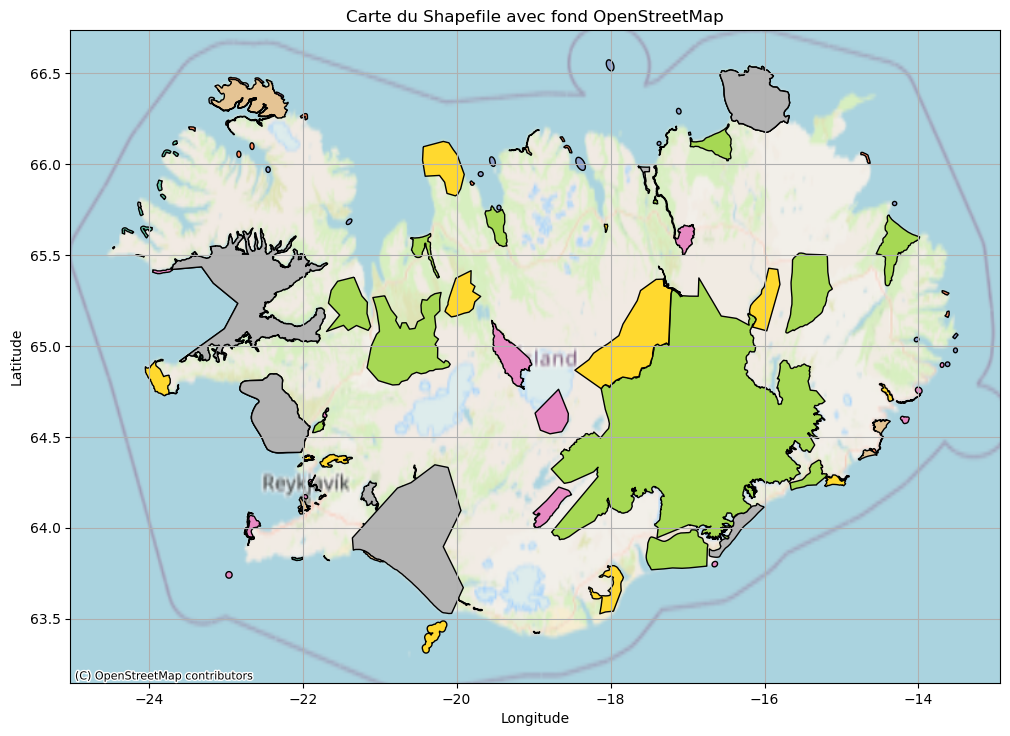

Carte sauvegardée sous 'carte_shapefile2_avec_fond.png'


<Figure size 640x480 with 0 Axes>

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import matplotlib
import contextily as ctx
%matplotlib inline

# Utiliser un backend compatible
matplotlib.use('Agg')
%matplotlib inline

# Chemin vers le fichier .shp
fichier_shp = "/home/onyxia/work/projet_python_2024_ENSAE/zones_ornithologiques"

# Lecture du fichier shapefile
gdf = gpd.read_file(fichier_shp)

# Affichage des premières lignes du GeoDataFrame
print(gdf.head())

# Transformation en EPSG:4326 si nécessaire
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)
print("Système de projection (CRS) :", gdf.crs)

# Conversion des géométries 3D en 2D
def convert_to_2d(geom):
    if geom is None:
        return None
    if geom.has_z:
        if isinstance(geom, Polygon):
            return Polygon([[x, y] for x, y, z in geom.exterior.coords])
        elif isinstance(geom, LineString):
            return LineString([[x, y] for x, y, z in geom.coords])
        elif isinstance(geom, Point):
            return Point(geom.x, geom.y)
    return geom

gdf["geometry"] = gdf["geometry"].apply(convert_to_2d)
print("Conversion en 2D terminée.")

# Vérification des géométries invalides
gdf = gdf[gdf.is_valid]
print("Nombre de géométries valides :", len(gdf))

'''
# Affichage de la carte et sauvegarde dans un fichier
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(ax=ax, edgecolor='black', cmap='Set2')
ax.set_title("Carte du Shapefile")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid()

# Sauvegarder la carte dans un fichier PNG
plt.savefig("/home/onyxia/work/projet_python_2024_ENSAE/carte_shapefile2.png")
print("Carte sauvegardée sous 'carte_shapefile2.png'")
'''

# Affichage de la carte et ajout du fond de carte
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plotting du GeoDataFrame
gdf.plot(ax=ax, edgecolor='black', cmap='Set2')

# Ajout d'un fond de carte via contextily (ici OpenStreetMap)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Personnalisation du graphique
ax.set_title("Carte du Shapefile avec fond OpenStreetMap")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid()
plt.show()

# Sauvegarder la carte dans un fichier PNG
plt.savefig("/home/onyxia/work/projet_python_2024_ENSAE/carte_shapefile2_avec_fond.png")
print("Carte sauvegardée sous 'carte_shapefile2_avec_fond.png'")